# Actividad Kmeans de Los Ángeles

### Mónica Ibarra Herrera

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('C:/Users/cesar/apps/data-analytics/data/raw/listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Condo in Culver City · 2 bedrooms · 2 beds · 2...,521,Paolo,Other Cities,Culver City,33.983010,-118.386070,Entire home/apt,129,30,2,2016-05-15,0.01,1,180,0,NaN
1,2708,Rental unit in Los Angeles · ★4.85 · 1 bedroom...,3008,Chas.,City of Los Angeles,Hollywood,34.096250,-118.346050,Private room,94,30,40,2023-07-31,0.35,2,271,2,NaN
2,2732,Rental unit in Santa Monica · ★4.41 · 1 bedroo...,3041,Yoga Priestess,Other Cities,Santa Monica,34.004400,-118.480950,Private room,179,7,24,2022-08-21,0.16,2,360,0,228269
3,63416,Home in Hollywood · ★4.99 · 1 bedroom · 2 beds...,309512,Vincenzo,City of Los Angeles,Hollywood Hills,34.113440,-118.323990,Private room,220,2,161,2023-11-18,1.02,3,0,23,HSR21-000113
4,2864,Rental unit in Bellflower · 1 bedroom · 1 bed ...,3207,Bernadine,Other Cities,Bellflower,33.874900,-118.115150,Entire home/apt,50,30,0,NaN,NaN,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45590,1036572578138800837,Home in Whittier · ★New · 3 bedrooms · 3 beds ...,272903865,Peter,Other Cities,Whittier,33.994012,-118.040152,Entire home/apt,392,1,0,NaN,NaN,2,68,0,NaN
45591,1037663899636896646,Guesthouse in Lawndale · ★New · Studio · 1 bed...,41272244,Karina,Other Cities,Lawndale,33.878159,-118.347681,Entire home/apt,95,1,0,NaN,NaN,1,269,0,NaN
45592,1036592552558009171,Home in Alhambra · ★New · 1 bedroom · 1 bed · ...,548780760,Anita,Other Cities,Alhambra,34.074170,-118.131870,Private room,40,1,0,NaN,NaN,9,235,0,NaN
45593,1036598124607548033,Home in Burbank · ★New · 3 bedrooms · 4 beds ·...,521839237,Ariena,Other Cities,Burbank,34.146740,-118.341910,Entire home/apt,216,3,0,NaN,NaN,31,269,0,NaN


No se van a usar las columnas de 'name', 'host_name' y 'license', 'last_review' y 'neighbourhood' porque son valores únicos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45595 entries, 0 to 45594
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45595 non-null  int64  
 1   name                            45595 non-null  object 
 2   host_id                         45595 non-null  int64  
 3   host_name                       45575 non-null  object 
 4   neighbourhood_group             45595 non-null  object 
 5   neighbourhood                   45595 non-null  object 
 6   latitude                        45595 non-null  float64
 7   longitude                       45595 non-null  float64
 8   room_type                       45595 non-null  object 
 9   price                           45595 non-null  int64  
 10  minimum_nights                  45595 non-null  int64  
 11  number_of_reviews               45595 non-null  int64  
 12  last_review                     

In [10]:
df.drop(columns=['neighbourhood','name','host_name','last_review','license'], axis=1, inplace=True) #las riview , license

<Axes: >

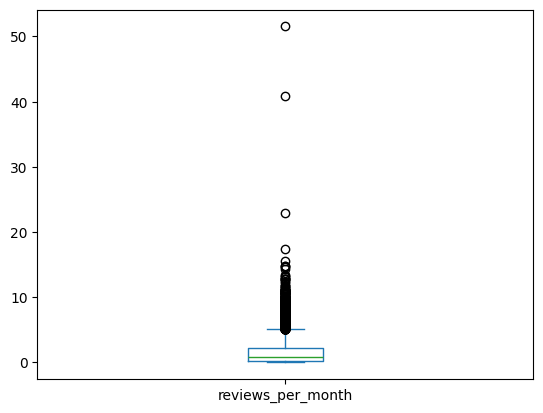

In [11]:
df['reviews_per_month'].plot(kind='box')

In [12]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45595 entries, 0 to 45594
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45595 non-null  int64  
 1   host_id                         45595 non-null  int64  
 2   neighbourhood_group             45595 non-null  object 
 3   latitude                        45595 non-null  float64
 4   longitude                       45595 non-null  float64
 5   room_type                       45595 non-null  object 
 6   price                           45595 non-null  int64  
 7   minimum_nights                  45595 non-null  int64  
 8   number_of_reviews               45595 non-null  int64  
 9   reviews_per_month               45595 non-null  float64
 10  calculated_host_listings_count  45595 non-null  int64  
 11  availability_365                45595 non-null  int64  
 12  number_of_reviews_ltm           

In [14]:
df = pd.get_dummies(df, columns=['neighbourhood_group','room_type'])
df



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_group_City of Los Angeles,neighbourhood_group_Other Cities,neighbourhood_group_Unincorporated Areas,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,109,521,33.983010,-118.386070,129,30,2,0.01,1,180,0,False,True,False,True,False,False,False
1,2708,3008,34.096250,-118.346050,94,30,40,0.35,2,271,2,True,False,False,False,False,True,False
2,2732,3041,34.004400,-118.480950,179,7,24,0.16,2,360,0,False,True,False,False,False,True,False
3,63416,309512,34.113440,-118.323990,220,2,161,1.02,3,0,23,True,False,False,False,False,True,False
4,2864,3207,33.874900,-118.115150,50,30,0,0.76,1,0,0,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45590,1036572578138800837,272903865,33.994012,-118.040152,392,1,0,0.76,2,68,0,False,True,False,True,False,False,False
45591,1037663899636896646,41272244,33.878159,-118.347681,95,1,0,0.76,1,269,0,False,True,False,True,False,False,False
45592,1036592552558009171,548780760,34.074170,-118.131870,40,1,0,0.76,9,235,0,False,True,False,False,False,True,False
45593,1036598124607548033,521839237,34.146740,-118.341910,216,3,0,0.76,31,269,0,False,True,False,True,False,False,False


In [15]:
df.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'neighbourhood_group_City of Los Angeles',
       'neighbourhood_group_Other Cities',
       'neighbourhood_group_Unincorporated Areas', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

### Normalización de datos

In [16]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()
X=min_max_scaler.fit_transform(df)

# Kmeans random init

In [17]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(df)

In [18]:
print("Points: ", kmeans.labels_)
print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [0 0 0 ... 1 1 1]
Centroids:  [ 3.03629440e+07  1.07752050e+08  3.40499949e+01 -1.18323227e+02
  2.62772696e+02  2.12383855e+01  5.58819794e+01  1.10445955e+00
  1.60476941e+01  1.56314850e+02  8.67334413e+00  5.46756457e-01
  3.69661580e-01  8.35819623e-02  6.92353593e-01  2.81305942e-03
  2.85696019e-01  1.91373284e-02]


In [19]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(df))

Score:  4.306828093884237e+38
Score:  -4.3068280938842364e+38


In [20]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(df)
    wcss.append(kmeans.inertia_)

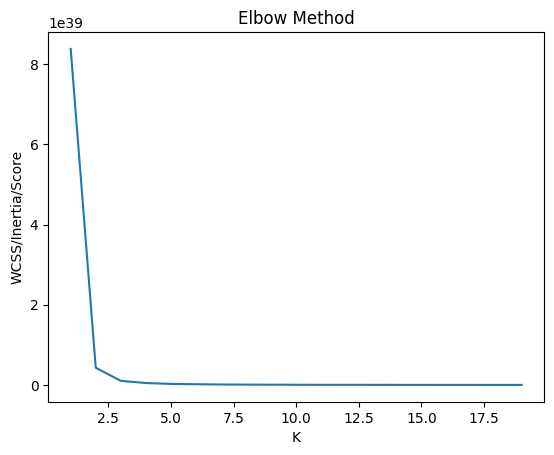

In [21]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()

In [22]:
def kmeans(X, k):
    
    # Step 1
    k = 2
    n_samples, _=X.shape
    idx = np.random.choice(n_samples, k, replace=True)
    centroids = X[idx, :]
    idx
    
    while True:
        # Step 2
        from scipy.spatial.distance import cdist
        distances = cdist(X, centroids)
        distances[0:5]

        # Step 3
        points = np.argmin(distances, axis=1)
        points

        # Step 4
        temp_centroids = []
        for cluster in range(k):
            cluster_points = X[points == cluster]
            temp_cluster_centroid = np.mean(cluster_points, axis=0)
            temp_centroids.append(temp_cluster_centroid)
        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [24]:
centroids

array([[3.46984732e-01, 2.92226768e-01, 5.01908517e-01, 4.30343606e-01,
        2.93735513e-03, 2.14918504e-02, 2.30789422e-02, 1.78199264e-02,
        4.51379757e-02, 5.23195785e-01, 9.72275563e-03, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.79744259e-01, 7.52179107e-04,
        1.95301093e-01, 2.42024689e-02],
       [4.33810683e-01, 3.79097637e-01, 4.70516424e-01, 5.21459297e-01,
        2.81262723e-03, 8.26953115e-03, 3.14780745e-02, 3.02263647e-02,
        2.01464119e-02, 4.91238453e-01, 2.33395668e-02, 0.00000000e+00,
        8.13951466e-01, 1.86048534e-01, 7.04966513e-01, 2.13099069e-03,
        2.83552231e-01, 9.35026529e-03]])

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Asignar los puntos a los clusters usando la función kmeans
points, _ = kmeans(X, 3)

# Crear DataFrame con los resultados de t-SNE y los clústeres asignados
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = points

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', palette='tab20', data=df_tsne)
plt.title('Visualización de Clústeres con t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()




KeyboardInterrupt: 